# ANALISIS EXPLORATORIO DE DATOS - MODULO 3
# AUTOR : Javier Chacnama
DATASET : [kaggle](https://www.kaggle.com/datasets/arzubesiroglu/udemy-courses-dataset)

In [35]:
!pip install kagglehub

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arzubesiroglu/udemy-courses-dataset")
file = '/udemy_courses_dataset.csv'

path_file = path + file

print("Path to dataset files:", path_file)

100%|██████████| 200k/200k [00:00<00:00, 53.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arzubesiroglu/udemy-courses-dataset/versions/1/udemy_courses_dataset.csv


In [37]:
!ls /root/.cache/kagglehub/datasets/arzubesiroglu/udemy-courses-dataset/versions/1

udemy_courses_dataset.csv


# IMPORTACIÓN DE LIBRERIAS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# APARIENCIA DE GRAFICOS

In [6]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [38]:
udemy_df = pd.read_csv(path_file)
udemy_df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


# 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

## 1.1 TIPOS DE DATOS Y CANTIDAD DE REGISTROS Y VARIABLES

In [39]:
udemy_df.dtypes

,0
course_id,int64
course_title,object
url,object
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64


In [40]:
udemy_df.dtypes.value_counts()

,count
int64,5
object,5
bool,1
float64,1


In [41]:
udemy_df.shape

(3678, 12)

## 1.2 ANALISIS DE VALORES NULOS

In [42]:
udemy_df.isnull().any()

,0
course_id,False
course_title,False
url,False
is_paid,False
price,False
num_subscribers,False
num_reviews,False
num_lectures,False
level,False
content_duration,False


In [43]:
udemy_df.isnull().sum().sort_values(ascending=False)

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [44]:
plot_null_udemy = udemy_df.isnull().melt(value_name='missing')
plot_null_udemy

,variable,missing
0,course_id,False
1,course_id,False
2,course_id,False
3,course_id,False
4,course_id,False
...,...,...
44131,subject,False
44132,subject,False
44133,subject,False
44134,subject,False


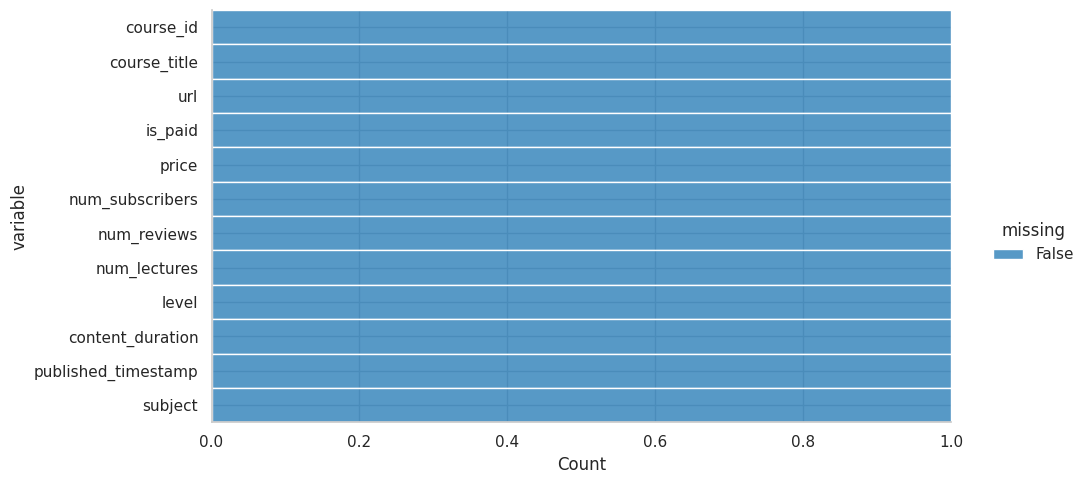

In [45]:
sns.displot(data=plot_null_udemy,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

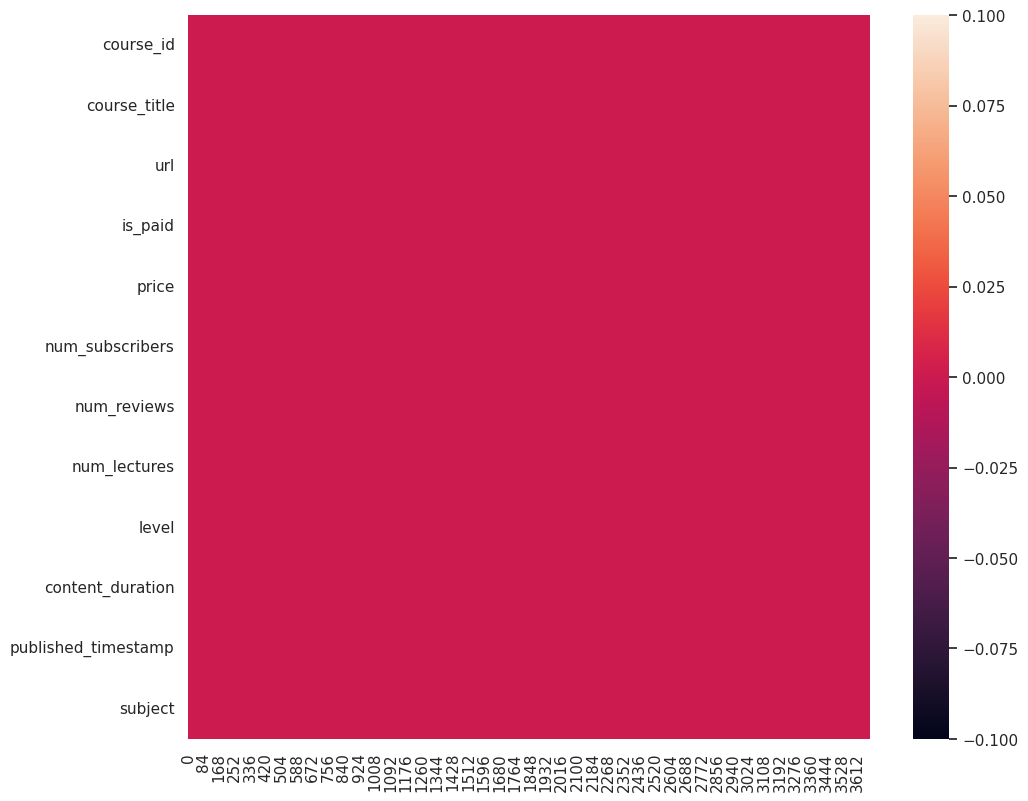

In [46]:
(
    udemy_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿ CUANTOS VALORES PERDERE SI ELIMINO LOS NULOS?

In [47]:
udemy_df.shape[0]

3678

In [48]:
udemy_df.dropna().shape[0]

3678

In [49]:
int(udemy_df.shape[0]) - int(udemy_df.dropna().shape[0])

0

### ELIMINAMOS LOS VALORES NULOS

In [50]:
udemy_df.dropna(inplace=True)
udemy_df.isnull().sum().sum()

0

# 2 FILTRADO DE DATOS PARA UN MEJOR ANALISIS

In [52]:
udemy_df.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


In [53]:
udemy_df.dtypes

,0
course_id,int64
course_title,object
url,object
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64


In [85]:
udemy_processed_df = udemy_df.drop(columns=['course_id','url','published_timestamp','is_paid']).copy()
udemy_processed_df

,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,100,1040,14,21,All Levels,2.0,Web Development
3674,How To Design A WordPress Website With No Codi...,25,306,3,42,Beginner Level,3.5,Web Development
3675,Learn and Build using Polymer,40,513,169,48,All Levels,3.5,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,50,300,31,38,All Levels,3.0,Web Development


# 3  CORRELACIONES

## 3.1 CORRELACIÓN DE VARIABLES NÚMERICAS

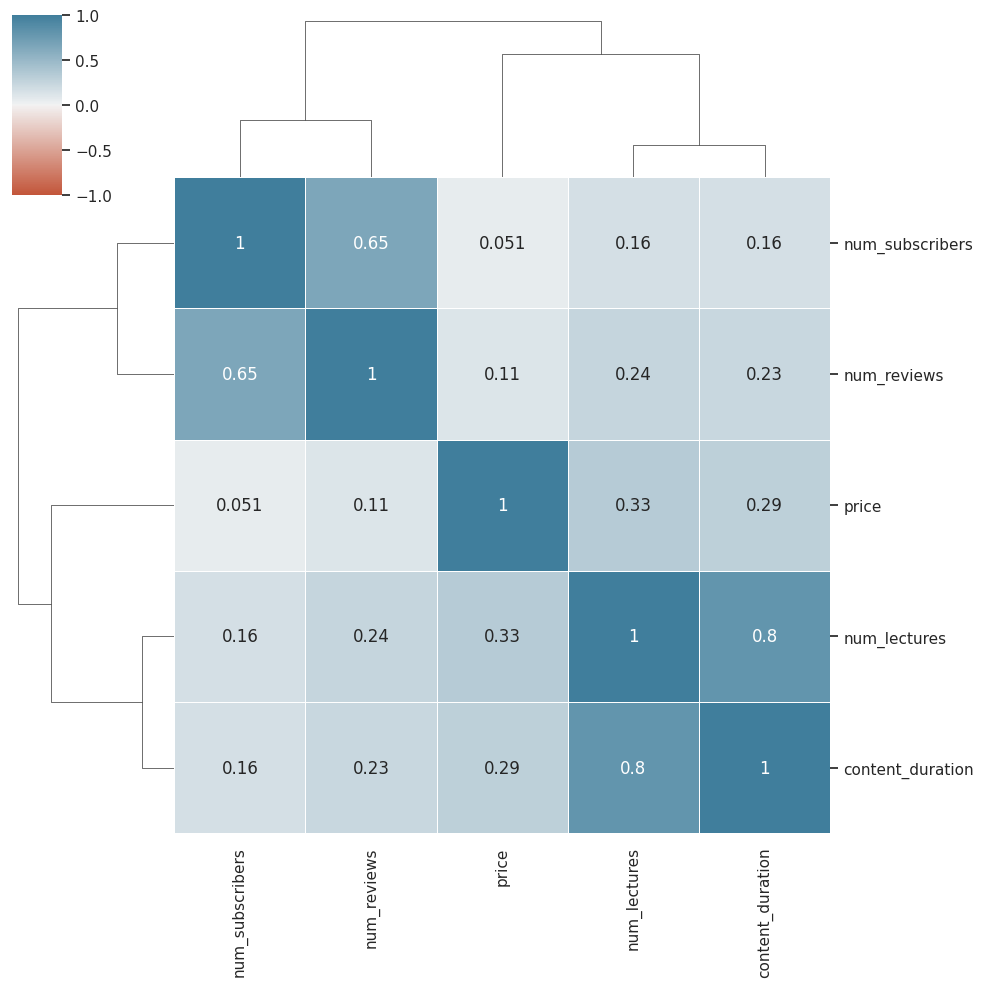

In [87]:
sns.clustermap(
    data=udemy_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

## 3.2 CORRELACIÓN CON VARIABLES CATEGORICAS

In [89]:
print(udemy_processed_df['level'].unique())
print(udemy_processed_df['subject'].unique())

['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [90]:
udemy_processed_df = (
    udemy_processed_df
    .assign(
        numeric_level=lambda df: df.level.replace(udemy_processed_df['level'].unique(),[0,1,2,3]),
        numeric_subject=lambda df: df.subject.replace(udemy_processed_df['subject'].unique(),[0,1,2,3]),
    )
)
udemy_processed_df

<ipython-input-90-802e02f70bf7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_level=lambda df: df.level.replace(udemy_processed_df['level'].unique(),[0,1,2,3]),
<ipython-input-90-802e02f70bf7>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_subject=lambda df: df.subject.replace(udemy_processed_df['subject'].unique(),[0,1,2,3]),


,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,numeric_level,numeric_subject
0,Ultimate Investment Banking Course,200,2147,23,51,All Levels,1.5,Business Finance,0,0
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,All Levels,39.0,Business Finance,0,0
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,Intermediate Level,2.5,Business Finance,1,0
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,All Levels,3.0,Business Finance,0,0
4,How To Maximize Your Profits Trading Options,200,1276,45,26,Intermediate Level,2.0,Business Finance,1,0
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,100,1040,14,21,All Levels,2.0,Web Development,0,3
3674,How To Design A WordPress Website With No Codi...,25,306,3,42,Beginner Level,3.5,Web Development,2,3
3675,Learn and Build using Polymer,40,513,169,48,All Levels,3.5,Web Development,0,3
3676,CSS Animations: Create Amazing Effects on Your...,50,300,31,38,All Levels,3.0,Web Development,0,3


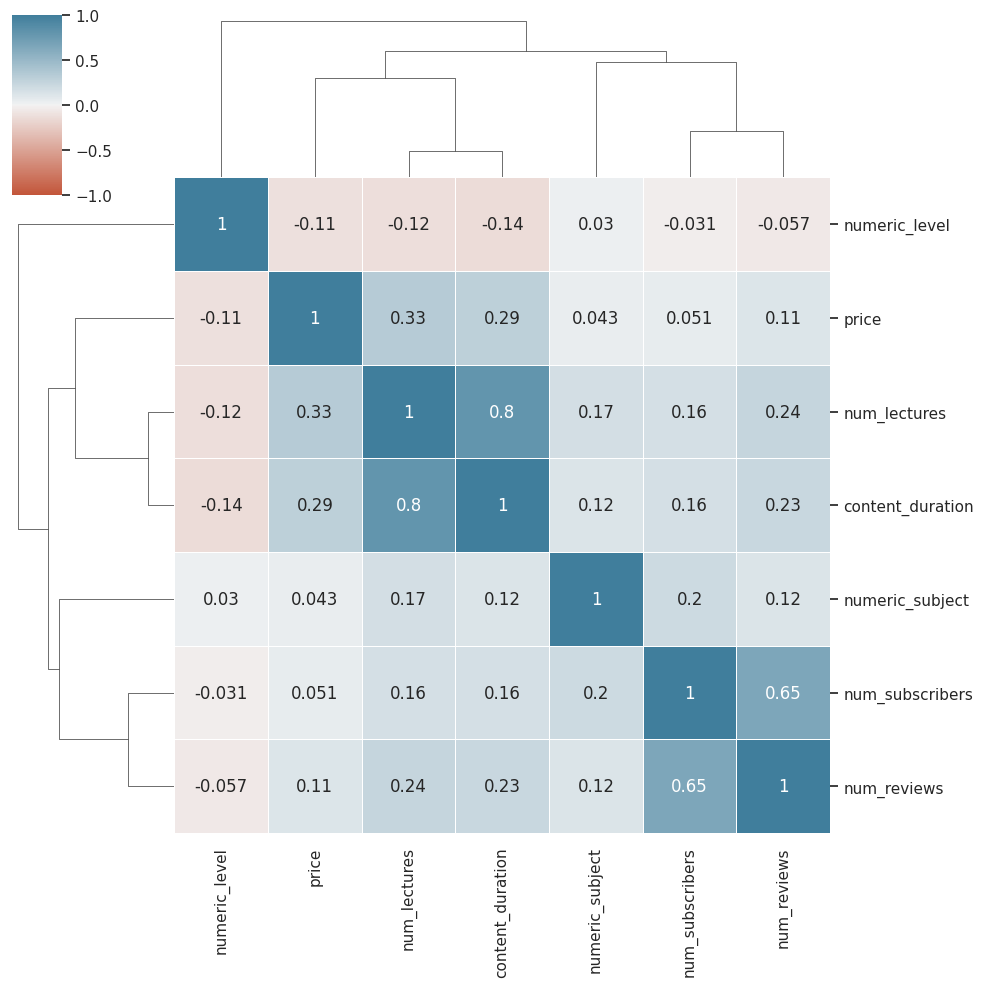

In [91]:
sns.clustermap(
    data=udemy_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

# 4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

## 4.1 TENDENCIA CENTRAL

In [92]:
udemy_processed_df.isnull().sum().sum()

0

In [93]:
udemy_processed_df.mean(numeric_only=True)

,0
price,66.049483
num_subscribers,3197.150625
num_reviews,156.259108
num_lectures,40.108755
content_duration,4.094517
numeric_level,0.852365
numeric_subject,1.512507


In [94]:
udemy_processed_df.median(numeric_only=True)

,0
price,45.0
num_subscribers,911.5
num_reviews,18.0
num_lectures,25.0
content_duration,2.0
numeric_level,0.0
numeric_subject,2.0


In [95]:
udemy_processed_df.mode(numeric_only=True)

,price,num_subscribers,num_reviews,num_lectures,content_duration,numeric_level,numeric_subject
0,20,0,0,12,1.0,0,3


## 4.2 DISPERSIÓN

In [96]:
udemy_processed_df.min(numeric_only=True)

,0
price,0.0
num_subscribers,0.0
num_reviews,0.0
num_lectures,0.0
content_duration,0.0
numeric_level,0.0
numeric_subject,0.0


In [97]:
udemy_processed_df.max(numeric_only=True)

,0
price,200.0
num_subscribers,268923.0
num_reviews,27445.0
num_lectures,779.0
content_duration,78.5
numeric_level,3.0
numeric_subject,3.0


In [98]:
udemy_processed_df.std(numeric_only=True)

,0
price,61.005755
num_subscribers,9504.117010
num_reviews,935.452044
num_lectures,50.383346
content_duration,6.053840
numeric_level,0.954618
numeric_subject,1.246035


In [99]:
(udemy_processed_df
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,price,20.0,45.0,95.00,75.00
1,num_subscribers,111.0,911.5,2546.00,2435.00
2,num_reviews,4.0,18.0,67.00,63.00
3,num_lectures,15.0,25.0,45.75,30.75
4,content_duration,1.0,2.0,4.50,3.50
5,numeric_level,0.0,0.0,2.00,2.00
6,numeric_subject,0.0,2.0,3.00,3.00


## 4.3 GRAFICA DE MEDIDAS CENTRALES Y DIPSERSIÓN DE LA VARIABLE video_duration_sec

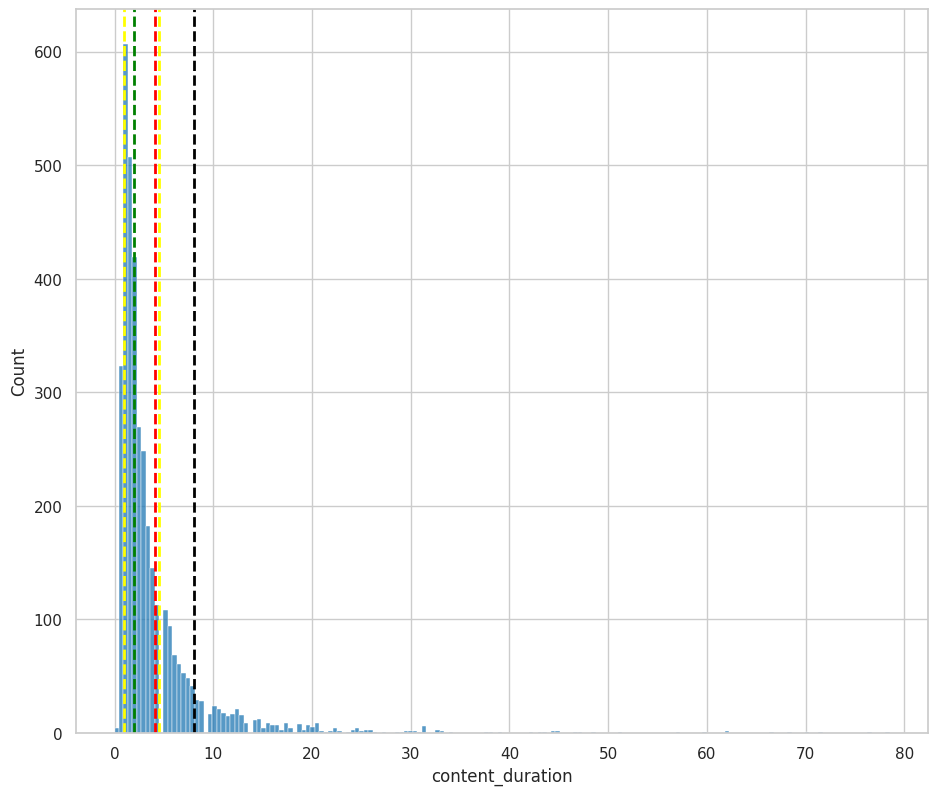

In [100]:
df = udemy_processed_df
variable = 'content_duration'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# 5 CONTEOS Y PROPORCIONES

In [101]:
udemy_processed_df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration,numeric_level,numeric_subject
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517,0.852365,1.512507
std,61.005755,9504.117010,935.452044,50.383346,6.053840,0.954618,1.246035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000,0.000000,0.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000,0.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000,2.000000,3.000000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000,3.000000,3.000000


In [102]:
udemy_processed_df.describe(include=object)

,course_title,level,subject
count,3678,3678,3678
unique,3663,4,4
top,Acoustic Blues Guitar Lessons,All Levels,Web Development
freq,3,1929,1200


## 5.1 CONTEO DE SUBJECT

In [109]:
subject_color = {
    'Web Development':'#ff6602ff',
    'Musical Instruments':'#0f7175ff',
    'Graphic Desing':'#0f247566',
    'Business Finance':'#001275ff'
}


<Axes: xlabel='subject'>

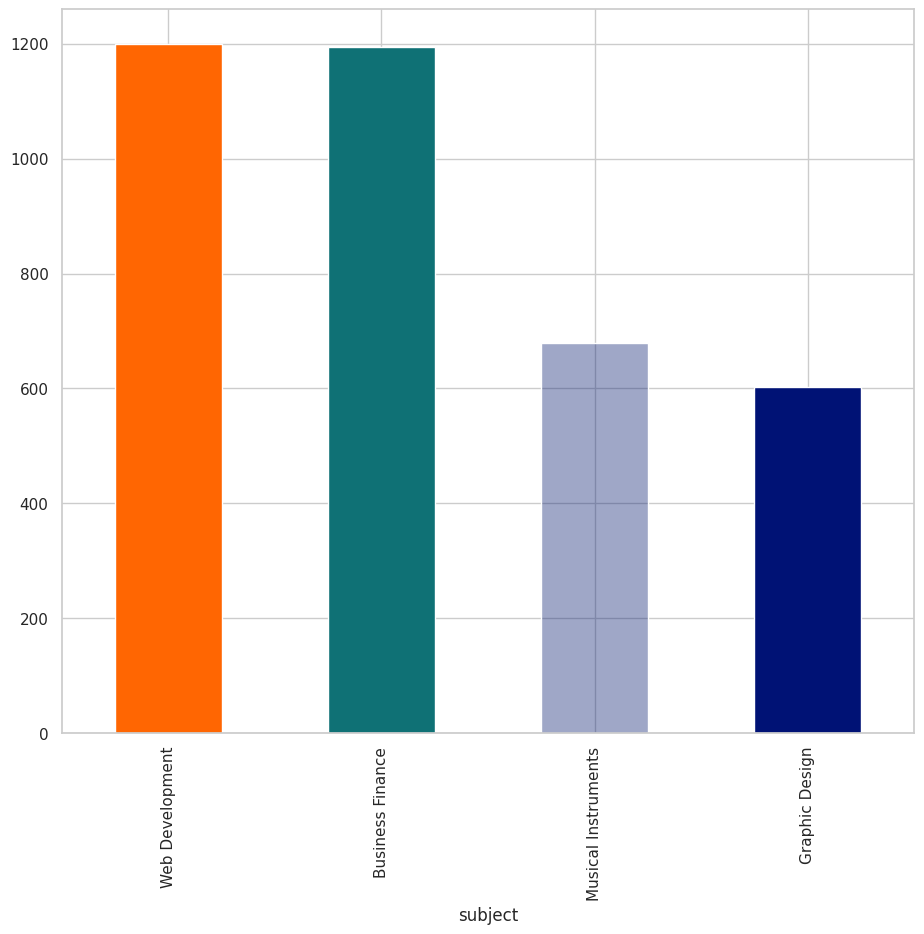

In [110]:
(
    udemy_processed_df
    .subject
    .value_counts()
    .plot(
        kind='bar',
        color=subject_color.values()
    )
)

## 5.2 PROPORCIONES DE SUBJECT

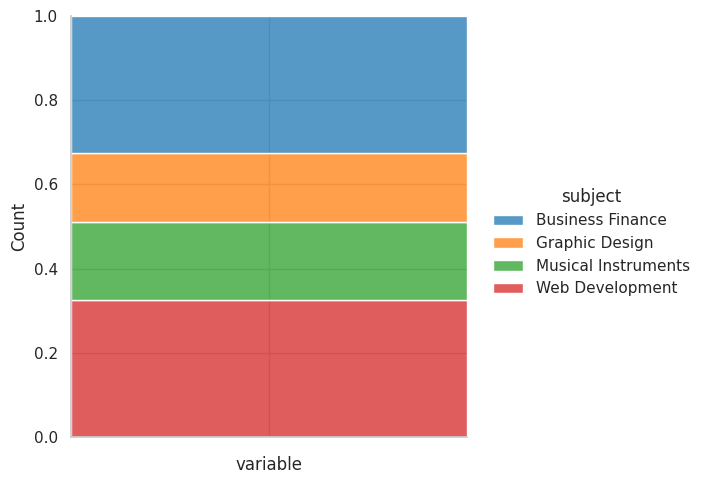

In [112]:
udemy_processed_df['variable'] = ''
(
    udemy_processed_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='subject',
                multiple='fill',
                #palette=claim_color
            )
        )
    )
)

# 6 ANALISIS BIVARIADO

<Axes: xlabel='num_subscribers', ylabel='num_reviews'>

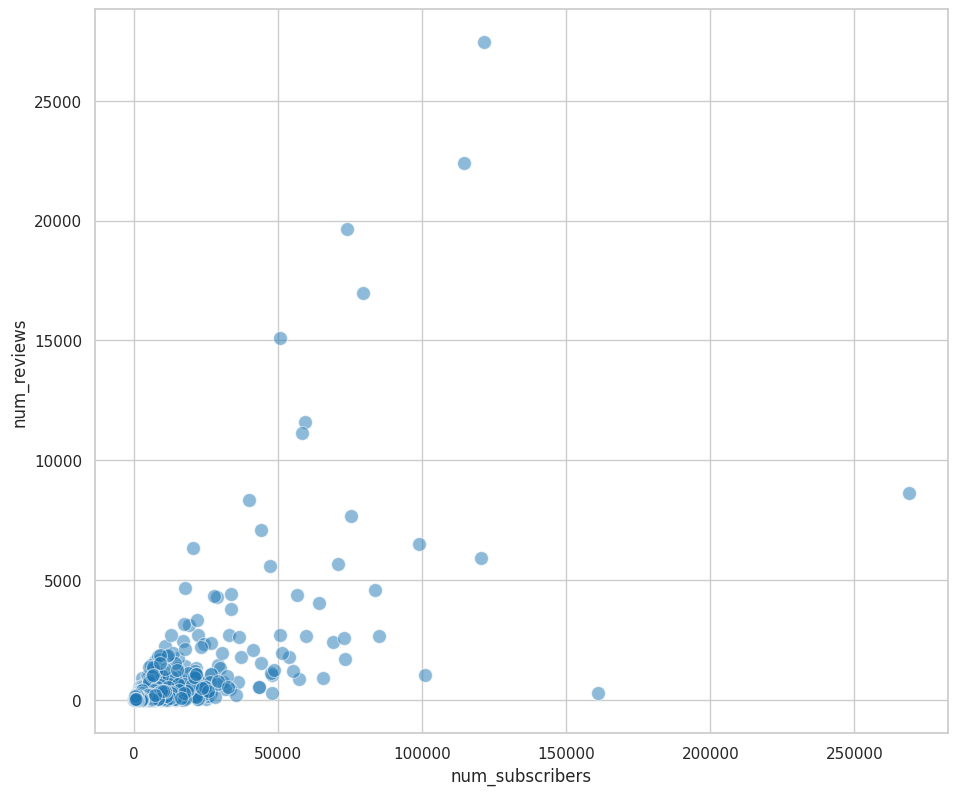

In [113]:
sns.scatterplot(
    data=udemy_processed_df,
    x='num_subscribers',
    y='num_reviews',
    alpha=1/2,
    s=100
)

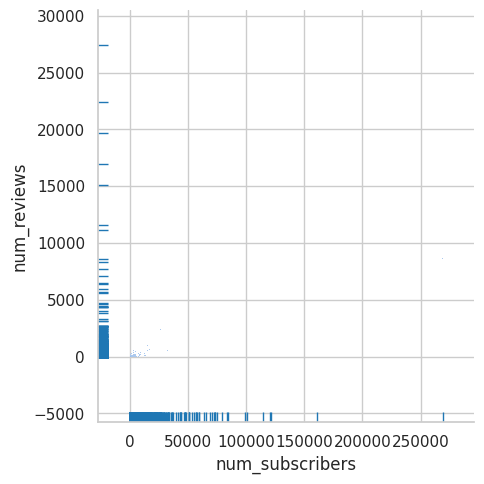

In [114]:
sns.displot(
    data=udemy_processed_df,
    x='num_subscribers',
    y='num_reviews',
    rug=True
)

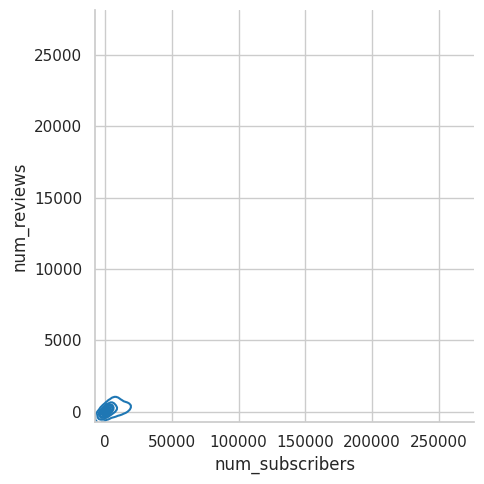

In [115]:
sns.displot(
    data=udemy_processed_df,
    x='num_subscribers',
    y='num_reviews',
    kind='kde',
    #rug=True
)

## 6.1 RELACIÓN ENTRE CATEGORICOS Y NÚMERICOS

<Axes: xlabel='level', ylabel='num_subscribers'>

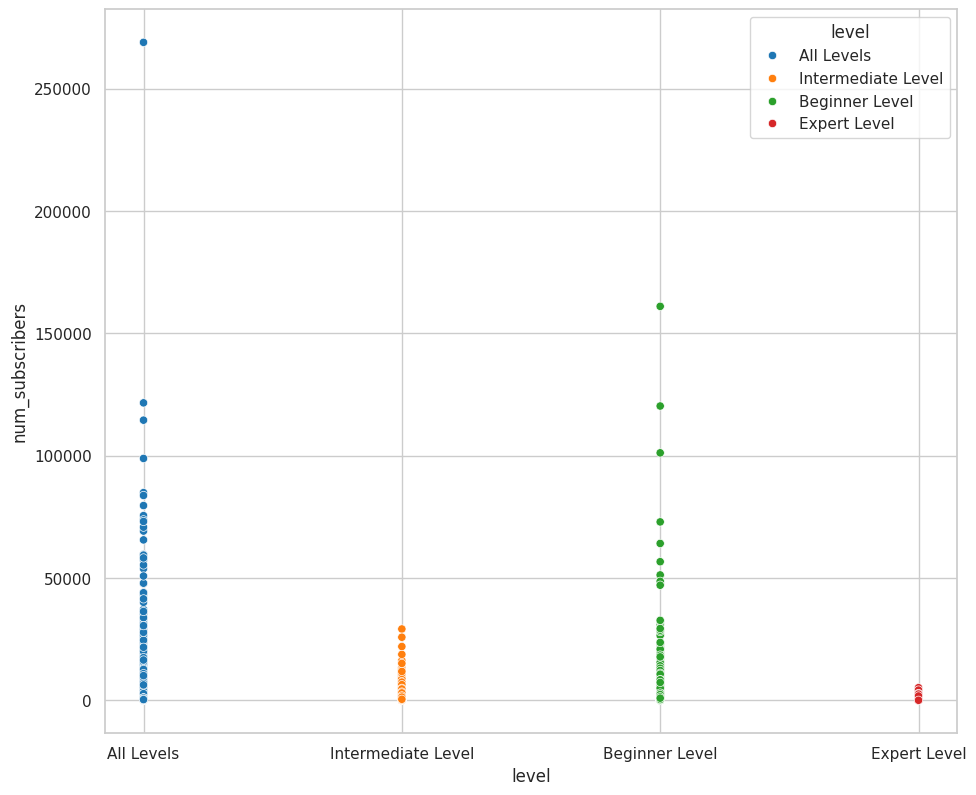

In [116]:
sns.scatterplot(
    data=udemy_processed_df,
    x='level',
    y='num_subscribers',
    hue='level'
)

<Axes: xlabel='level', ylabel='num_subscribers'>

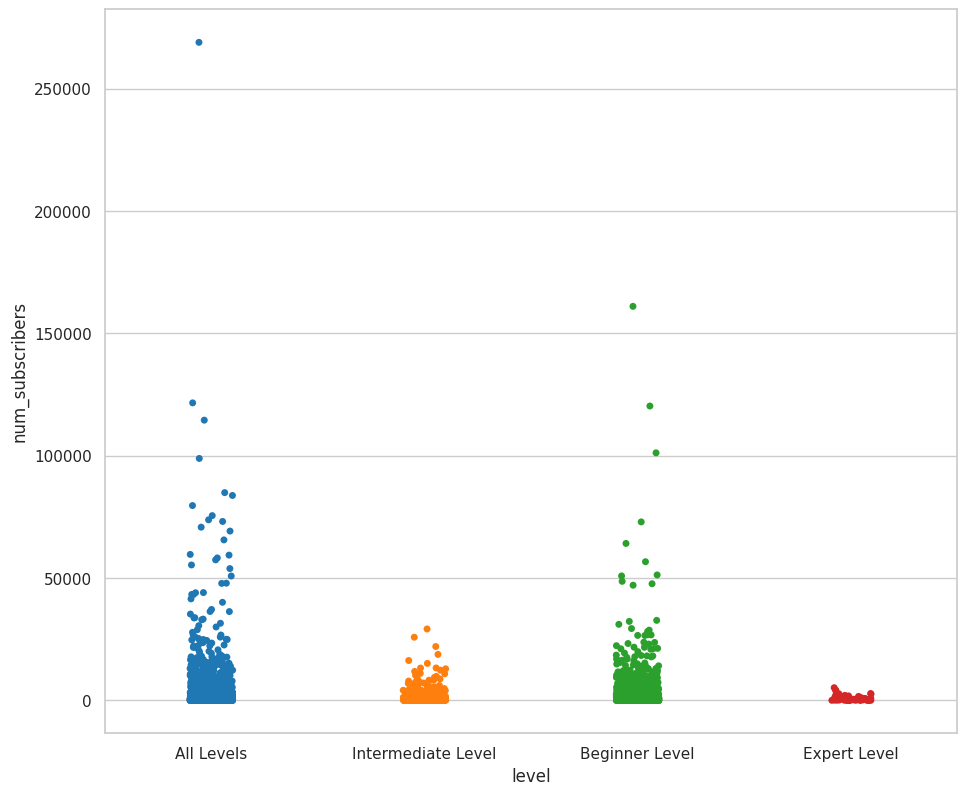

In [118]:
sns.stripplot(
    data=udemy_processed_df,
    x='level',
    y='num_subscribers',
    hue='level'
)

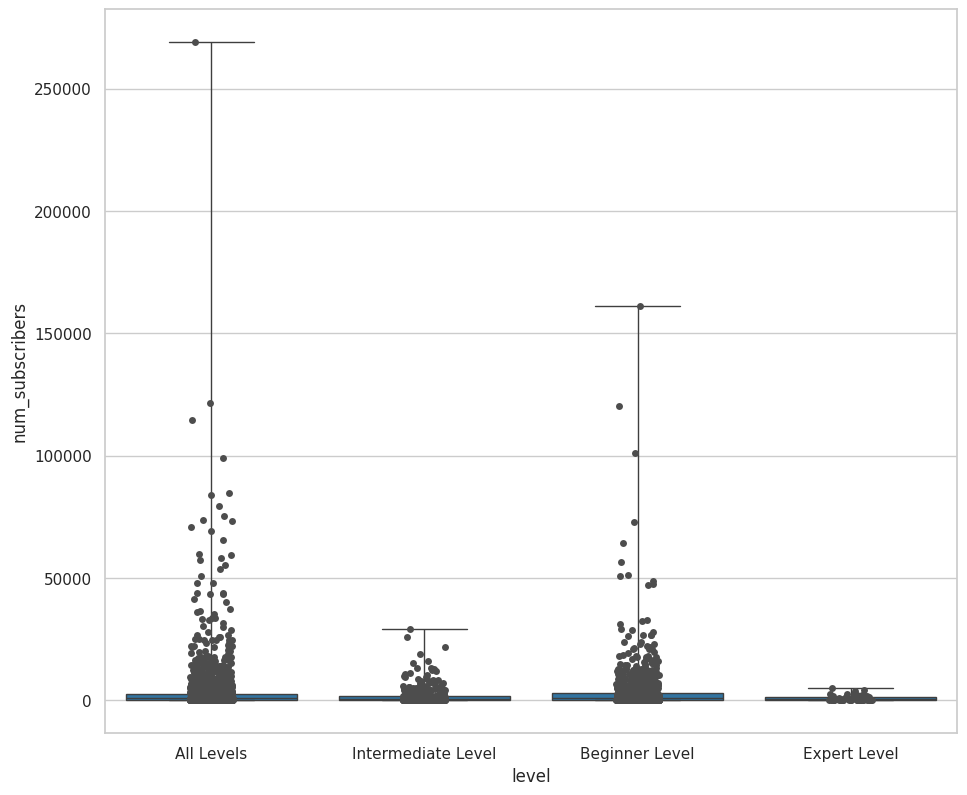

In [119]:
ax = sns.boxplot(
    data=udemy_processed_df,
    x='level',
    y='num_subscribers',
    whis=np.inf
)

ax = sns.stripplot(
    data=udemy_processed_df,
    x='level',
    y='num_subscribers',
    color='.3'
)